In [69]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

In [96]:
import matplotlib.pyplot as plt

In [144]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')


In [145]:
#QUESTION 1

In [146]:
df.shape

(1154112, 7)

In [147]:
#QUESTION 2

In [148]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [149]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [150]:
df['duration'].mean()

19.1672240937939

In [151]:
#Data preparation

C:\Users\AX-St\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

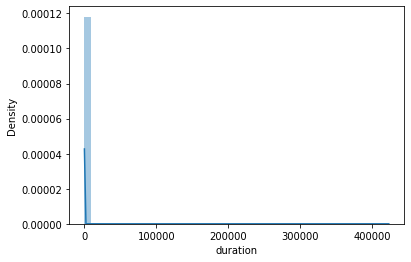

In [152]:
sns.distplot(df['duration'])

In [153]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [154]:
len(df.duration)

1109826

In [155]:
print('we droped '+str(1154112 - len(df.duration))+' records')

we droped 44286 records


In [156]:
#QUESTION 3

In [157]:
df = df[['PUlocationID','DOlocationID','duration']]

In [158]:
df['PUlocationID'].isnull().sum()/(len(df['PUlocationID']))

0.8352732770722617

In [159]:
#replace nan values with -1

In [160]:
#check first for duration
df['duration'].isnull().sum()/(len(df['duration']))

0.0

In [161]:
#repalce nan values
df[np.isnan(df)] = -1

In [162]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].astype(str)

In [163]:
#QUESTION 4

In [164]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

In [165]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [166]:
#QUESTION 5

In [167]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.5285191072048

C:\Users\AX-St\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AX-St\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


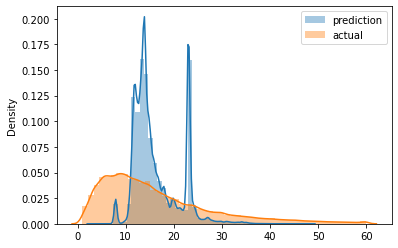

In [168]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [169]:
#QUESTION 6

In [170]:
#read data
df2 = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')


#process
df2['duration'] = df2['dropOff_datetime'] - df2['pickup_datetime']
df2.duration = df2.duration.apply(lambda td: td.total_seconds()/60)
df2 = df2[(df2.duration >= 1) & (df2.duration <= 60)]
df2 = df2[['PUlocationID','DOlocationID','duration']]
df2[np.isnan(df2)] = -1
categorical = ['PUlocationID', 'DOlocationID']

df2[categorical] = df2[categorical].astype(str)


#Onehot encoding transf
X_val = dv.transform(val_dicts)

target = 'duration'
y_val = df2[target].values

#validate
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.01428314516757